# Assignment 3

In [0]:
!pip install -q Keras #Update Keras Package Directly in Python Notebook
import keras #Import Keras Package to use further for Deep Learning

Using TensorFlow backend.


In [0]:
import numpy as np #Giving np as an alias to numpy to use the shortened name further
from keras.models import Sequential #Import Sequential from keras to create a model layer by layer. The Sequential is inherited from Keras models
from keras.layers import Flatten #Import Flatten which is inherited from Keras layers. Flatten helps to unroll the values from beginning to last
from keras.layers import Convolution2D #Import Convolution2D inherited from Keras layers. Usefull to filter the layers of 2D Images
from keras.utils import np_utils #Import np_utils inherited from Keras utils. Helps to conver array to a binary one hot vector
from keras.datasets import mnist #Import the mnist Dataset from Keras Database. mnist is a handwritten digit database

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Download mnist dataset and Assign Input, Output Variables for Train and Test datasets

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


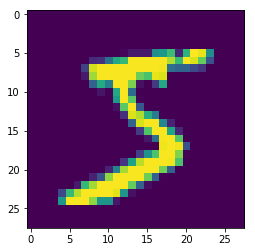

In [0]:
print(X_train.shape)#Print the shape/Dimension of input variables of the Train dataset
from matplotlib import pyplot as plt#Import pyplot inherited from matplotlib and give alias as plt. This will help us to plot and visulaise charts
%matplotlib inline 
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) #Shape of train dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature
X_test = X_test.reshape(X_test.shape[0],28,28,1)#Shape of test dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature

In [0]:
X_train = X_train.astype('float32') #Change the data type to float
X_test = X_test.astype('float32') #Change the data type to float
X_train /= 255  # Normalise the data values to a range of [0,1]
X_test /= 255 # Normalise the data values to a range of [0,1]


In [0]:
y_train[:10] #First 10 elements of one dimensional y_train array

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10] #First 10 elements of 10 dimensional class array of Y_train

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, BatchNormalization, Dropout, MaxPooling2D
model = Sequential()

 
model.add(Convolution2D(16, 3,3, activation='relu', input_shape=(28,28,1))) #Layer1 Apply 16 3*3 Filters with Relu Activation 
model.add(Convolution2D(10, 3,3, activation='relu')) #Layer2 Apply 10 3*3 Filters with Relu Activation
model.add(BatchNormalization()) #Applying BatchNormalization 
model.add(MaxPooling2D(2,2)) #Pooling Layer1 MaxPooling to reduce the parameters
model.add(Dropout(.20)) #Using Dropout to drop 20% of the features randomly

model.add(Convolution2D(16, 3,3, activation='relu')) #Layer3 Applying 16 3*3 Filters with Relu Activation
model.add(Convolution2D(10, 3,3, activation='relu')) #Layer4 Applying 10 3*3 Filters with Relu Activation
model.add(BatchNormalization())#Applying BatchNormalization 
model.add(MaxPooling2D(2,2))#Pooling Layer2 MaxPooling to reduce the parameters
model.add(Dropout(.30))#Using Dropout to drop 30% of the features randomly

model.add(Convolution2D(10, 3,3, activation='relu'))#Layer5 Applying 10 3*3 Filters with Relu Activation
model.add(Convolution2D(10, 1, activation='relu'))#Layer6 Applying 10 1*1 Filter with Relu Activation
model.add(Convolution2D(10, 2)) #output Layer 10 2*2 Filters
model.add(Flatten()) #Flatten the complete layer
model.add(Activation('softmax')) #Activate and apply softmax to identify the probability of the identified channels in train or image

model.summary() #Gives you model summary

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        1450      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        1456      
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


In [0]:
model.compile(loss='categorical_crossentropy', #Since we have one hot encoding here. We are using categorical cross entropy to calculate the loss function
             optimizer='adam', #Using adam optimiser as we require step wise optimiser in our excercise here
             metrics=['accuracy']) # Gives us an accuracy of the model

In [0]:
model.fit(X_train, Y_train, batch_size=1028, nb_epoch=30, verbose=1) #Fit model using the first argument as an numpy array for training data. Second argument as numpy array of test data. with batch size of 32 of 10 iterations with progressive bar per epoch

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 5s 86us/step - loss: 1.7636 - acc: 0.4006
Epoch 2/30
60000/60000 [==============================] - 1s 21us/step - loss: 0.7507 - acc: 0.7655
Epoch 3/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.3861 - acc: 0.8788
Epoch 4/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.2637 - acc: 0.9178
Epoch 5/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.2020 - acc: 0.9373
Epoch 6/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.1690 - acc: 0.9470
Epoch 7/30
60000/60000 [==============================] - 1s 21us/step - loss: 0.1470 - acc: 0.9548
Epoch 8/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.1321 - acc: 0.9589
Epoch 9/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.1213 - acc: 0.9625
Epoch 10/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.1127 - acc: 0.9645

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) #Evaluate the model on test data 

In [0]:
print(score) #Print the Evaluation score

[0.030900418920355152, 0.9901]


In [0]:
y_pred = model.predict(X_test) #Predict on the Test data

In [0]:
print(y_pred[:9]) #Print Predicted Values
print(y_test[:9]) #Print Actual Values

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


What is wrong with this model?

Ans: 1. The processing time taking for this one is more as we are using 25,348,362 parameters and the accuracy of the model is also low.